In [2]:
import cv2
import imutils
import datetime
import matplotlib.pyplot as plt

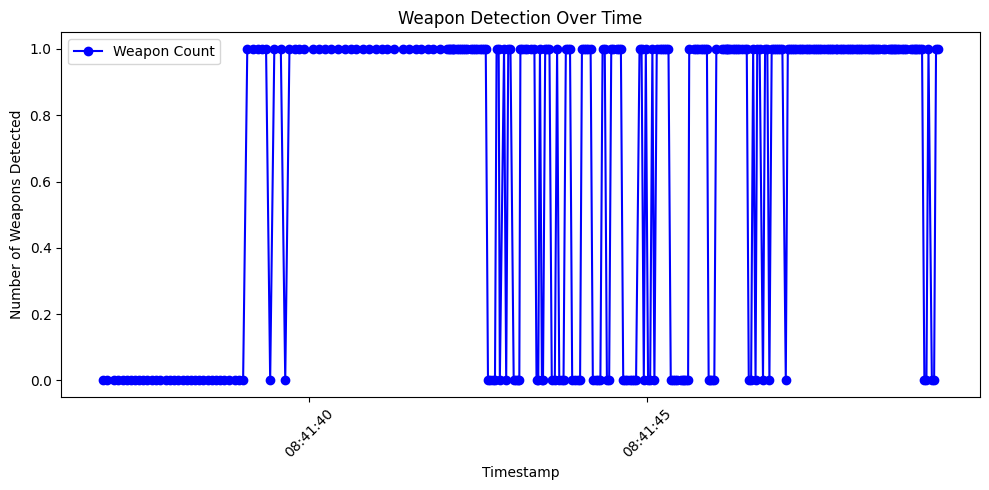

In [6]:
import cv2
import imutils
import datetime
import matplotlib.pyplot as plt

gun_cascade = cv2.CascadeClassifier('cascade.xml')
camera = cv2.VideoCapture(0)
firstFrame = None
timestamps = []
weapon_counts = []

while True:
    ret, frame = camera.read()
    if frame is None:
        break
    
    frame = imutils.resize(frame, width=500)
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    guns = gun_cascade.detectMultiScale(gray, 1.3, 20, minSize=(100, 100))
    weapon_count = len(guns)
    if weapon_count > 0:
        weapon_counts.append(1) 
    else:
        weapon_counts.append(0)
    timestamps.append(datetime.datetime.now())
    
    for (x, y, w, h) in guns:
        frame = cv2.rectangle(frame, (x, y), (x + w, y + h), (255, 0, 0), 2)
        roi_gray = gray[y:y + h, x:x + w]
        roi_color = frame[y:y + h, x:x + w]
    
    if firstFrame is None:
        firstFrame = gray
        continue
    
    cv2.putText(frame, datetime.datetime.now().strftime("%A %d %B %Y %I:%M:%S %p"),
                (10, frame.shape[0] - 10),
                cv2.FONT_HERSHEY_SIMPLEX,
                0.35, (0, 0, 255), 1)
    
    cv2.imshow("Security Feed", frame)
    
    key = cv2.waitKey(1) & 0xFF
    if key == ord('q'):
        break

camera.release()
cv2.destroyAllWindows()

# Plotting the graph
plt.figure(figsize=(10, 5))
plt.plot(timestamps, weapon_counts, marker='o', color='b', label='Weapon Count')
plt.xlabel('Timestamp')
plt.ylabel('Number of Weapons Detected')
plt.title('Weapon Detection Over Time')
plt.xticks(rotation=45)
plt.tight_layout()
plt.legend()
plt.show()


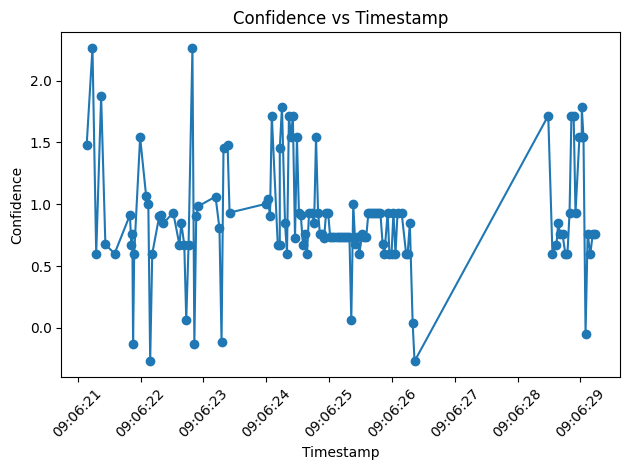

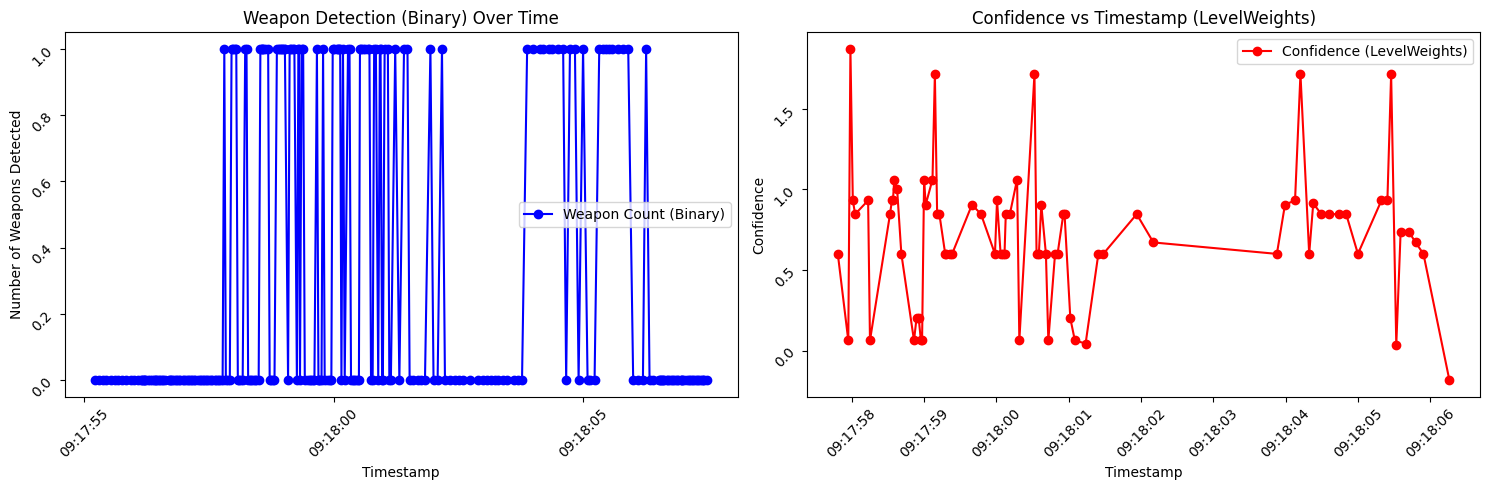

In [10]:
import cv2
import imutils
import datetime
import matplotlib.pyplot as plt
import numpy as np

gun_cascade = cv2.CascadeClassifier('cascade.xml')
camera = cv2.VideoCapture(0)
firstFrame = None

timestamps_binary = []
weapon_counts_binary = []

timestamps_levelWeights = []
confidences = []

while True:
    ret, frame = camera.read()
    if frame is None:
        break
    
    frame = imutils.resize(frame, width=500)
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    # Binary detection (Counting weapons)
    guns_binary = gun_cascade.detectMultiScale(gray, 1.3, 20, minSize=(100, 100))
    weapon_count_binary = len(guns_binary)
    if weapon_count_binary > 0:
        weapon_counts_binary.append(1) 
    else:
        weapon_counts_binary.append(0)
    timestamps_binary.append(datetime.datetime.now())

    # LevelWeights detection
    guns_levelWeights = gun_cascade.detectMultiScale3(gray, 1.3, 20, minSize=(100, 100), outputRejectLevels=True)
    
    if firstFrame is None:
        firstFrame = gray
        continue

    for (x, y, w, h), rejectLevels, levelWeights in zip(*guns_levelWeights):
        # Draw rectangle around the detected object
        frame = cv2.rectangle(frame, (x, y), (x + w, y + h), (255, 0, 0), 2)
        
        # Save timestamp and confidence level
        timestamps_levelWeights.append(datetime.datetime.now())
        if weapon_count_binary == 0:
            confidences.append(0)
        else:
            confidences.append(np.mean(levelWeights))
    
    cv2.putText(frame, datetime.datetime.now().strftime("%A %d %B %Y %I:%M:%S %p"),
                (10, frame.shape[0] - 10),
                cv2.FONT_HERSHEY_SIMPLEX,
                0.35, (0, 0, 255), 1)
    
    cv2.imshow("Security Feed", frame)
    
    key = cv2.waitKey(1) & 0xFF
    if key == ord('q'):
        break

# Plotting the graphs side by side
fig, axs = plt.subplots(1, 2, figsize=(15, 5))

# Plotting the binary detection
axs[0].plot(timestamps_binary, weapon_counts_binary, marker='o', color='b', label='Weapon Count (Binary)')
axs[0].set_xlabel('Timestamp')
axs[0].set_ylabel('Number of Weapons Detected')
axs[0].set_title('Weapon Detection (Binary) Over Time')
axs[0].tick_params(rotation=45)
axs[0].legend()

# Plotting the levelWeights detection
axs[1].plot(timestamps_levelWeights, confidences, marker='o', color='r', label='Confidence (LevelWeights)')
axs[1].set_xlabel('Timestamp')
axs[1].set_ylabel('Confidence')
axs[1].set_title('Confidence vs Timestamp (LevelWeights)')
axs[1].tick_params(rotation=45)
axs[1].legend()

plt.tight_layout()
plt.show()

camera.release()
cv2.destroyAllWindows()


In [ ]:
import cv2
import imutils
import datetime
import matplotlib.pyplot as plt

gun_cascade = cv2.CascadeClassifier('cascade.xml')
camera = cv2.VideoCapture(0)
firstFrame = None
timestamps = []
weapon_counts = []

while True:
    ret, frame = camera.read()
    if frame is None:
        break
    
    frame = imutils.resize(frame, width=500)
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    guns = gun_cascade.detectMultiScale(gray, 1.3, 20, minSize=(100, 100))
    weapon_count = len(guns)
    if weapon_count > 0:
        weapon_counts.append(1) 
    else:
        weapon_counts.append(0)
    timestamps.append(datetime.datetime.now())
    
    for (x, y, w, h) in guns:
        frame = cv2.rectangle(frame, (x, y), (x + w, y + h), (255, 0, 0), 2)
        roi_gray = gray[y:y + h, x:x + w]
        roi_color = frame[y:y + h, x:x + w]
    
    if firstFrame is None:
        firstFrame = gray
        continue
    
    cv2.putText(frame, datetime.datetime.now().strftime("%A %d %B %Y %I:%M:%S %p"),
                (10, frame.shape[0] - 10),
                cv2.FONT_HERSHEY_SIMPLEX,
                0.35, (0, 0, 255), 1)
    
    cv2.imshow("Security Feed", frame)
    
    key = cv2.waitKey(1) & 0xFF
    if key == ord('q'):
        break

camera.release()
cv2.destroyAllWindows()

# Plotting the graph
plt.figure(figsize=(10, 5))
plt.plot(timestamps, weapon_counts, marker='o', color='b', label='Weapon Count')
plt.xlabel('Timestamp')
plt.ylabel('Number of Weapons Detected')
plt.title('Weapon Detection Over Time')
plt.xticks(rotation=45)
plt.tight_layout()
plt.legend()
plt.show()
